# Module 3 Notes: Priors and models for discrete data

## Contents
Lesson 6: Priors
* 6.1 Priors and prior predictive distributions
* 6.2 Prior predictive: Binomial
* 6.3 Posterior Predictive Distribution

Lesson 7: Bernoulli/Binomial
* 7.1 Ber/Bin with uniform prior
* 7.2 Conjugate priors
* 7.3 Posterior mean and effective sample size
* data analysis in R and Excel

Lesson 8: Poisson

## Lesson 6 Priors
### Lesson 6.1 Priors and prior predictive distributions
How do we choose a prior? Needs to reflect
* our beliefs
* our personal perspective
* our uncertainties

**DGI** In effect, we are defining a CDF for the parameter: $P(\theta \le c)$ for all $c \in R$

But this isn't practical to do. In practice we work with a convinient family.

The exact prior isn't actually super important. The prior will eventually be overwhelmed by data, so if you get it in the right ball park, the outcome will be about the same.

But there are things that go wrong. If your prior is $P(\theta = 0.5) = 1$, your posterior will just be: 

$$f(\theta \mid y) \propto f(y\mid\theta)f(\theta) = f(\theta)$$

If you are certain about your prior, no amount of data will change your view.

#### Calibration of predictive intervals
If we make an interval where we predict 95% of new data points will occur in this interval, it would be good if that actually happened. So how do we calibrate to reality? This is more of a frequentist concept, but it's useful in practice. We want to make sure our results reflect reality.

Note this is an interval for the *data*, for Y, for X, not for $\theta$.

Start from our definition of $f(y)$. This is our **prior predictive** before we observe any data.

$$f(y) = \int f(y \mid \theta) f(\theta) d\theta = \int f(y,\theta) d\theta$$

That second part is taking the joint density for y and theta, integrating out theta to get the marginal density for y. Recall $P(A\mid B) = \frac{P(A \cap B)}{P(B)}$, which in our terms for data analysis is $f(y\mid \theta) = \frac{f(y,\theta)}{f(\theta)}$, so $f(y\mid \theta)\cdot f(\theta) = f(y,\theta)$.


### Lesson 6.2: Binomial Example of the Prior Predictive

Suppose we are going to flip a coin 10 times and count the heads. Here we're not actually doing it, we're just thinking about it in advance of actually doing it. We're interested in the predictive distribution; how many head do we predict we're going to see? This is dependent on the fairness of the coin itself.

We can say X is the sum of the results of the individual coin flips Y1 through Y10.

$$X = \sum_{i_i}^{10} Y_i$$

Our prior $\theta$ is our judgement of the probability that a flip of the coin will come up heads, ST $X \sim Bin(\theta)$. If we think that all possible probabilities (all possible coins) are equally likely, we can put a prior that's flat (uniform) over 0 to 1.

$$f(\theta) = I_{0 \le \theta \le 1}$$

So what's our predictive distribution for the number of heads we'll see, some number between 1 and 10?

$$f(x) = \int f(x \mid \theta) f(\theta) d\theta = \int {10 \choose x} \theta^x (1-\theta)^{10-x} I_{0\le\theta\le 1} d\theta = \int_0^1 \frac{10!}{x!(10-x)!} \theta^x (1-\theta)^{10-x} d\theta $$

(Note that here, because what we're interested in is $x$, we have to pay attention to the difference between a Bernoulli and a Binomial distribution. Previously we could basically ignore this because we were looking at $\theta$, and the part of the integral that depends on theta is the same for both Bin and Ber.)

Integrating this is kinda tough, have to pull out some real maths.

Recall that $n! = \Gamma(n+1)$, where the gamma function is a generalisation of factorial which can be used for non-integers.

Also, if $Z \sim Beta(\alpha, \beta)$, then the PDF of Z

$$f(z) = \frac{\Gamma\left(\alpha + \beta\right)}{\Gamma\left(\alpha\right)\Gamma\left(\beta\right)}z^{\alpha-1}(1-z)^{\beta-1}$$

And the CDF is:

$$P(a \lt Z \lt b) = \int_a^b \frac{\Gamma\left(\alpha + \beta\right)}{\Gamma\left(\alpha\right)\Gamma\left(\beta\right)}z^{\alpha-1}(1-z)^{\beta-1} dz$$

Integrating this function wrt Z over the interval 0,1 is exactly equivalent to the CDF of the Beta function with $P(0 \lt Z \lt 1)$, or in other words 1.

We can take advantage of this by reformulating f(x) to look like a beta distribution.

$$f(x) = \int_0^1 \frac{\Gamma(11)}{\Gamma(x+1)\Gamma(11-x)} \theta^{(x+1)-1} (1-\theta)^{(11-x)-1} d\theta $$

$$ = \frac{\Gamma(11)}{\Gamma(12)} \int_0^1 \frac{\Gamma(12)}{\Gamma(x+1)\Gamma(11-x)} \theta^{(x+1)-1} (1-\theta)^{(11-x)-1} d\theta $$

so here $x+1 = \alpha$ and $11-x = \beta$, and everything in the integral =1.

so $$f(x) = \frac{\Gamma(11)}{\Gamma{12}} = \frac{10!}{11!} = \frac{1}{11} \text{ for } x \in \{0,1,\dots,10\}$$

so if you start with a uniform prior you end up with a discrete and uniform predictive density for x. This makes intuitive sense: if all coins are equally likely, then all possible outcomes of the experiment should be equally likely.

### Lesson 6.3: Posterior predictive distribution 

What about after we've observed?

Suppose we have a coin, we don't know what the probability is it will come up heads. We observe a head on the first flip. What's our predictive distribution for 2nd flip, given we saw a head on the 1st flip? 

$$f(y_2 \mid y_1) = \int f(y_2 \mid \theta,y_1) f(\theta \mid y_1) d\theta$$

Note we're treating Y2 as independent from Y1, implies we can simplify to 

$$f(y_2 \mid y_1) = \int f(y_2 \mid \theta) f(\theta \mid y_1) d\theta$$

This looks very similar to the prior predictive except we're using the posterior distribution for theta instead of the prior.

The prediction for y2 is no longer going to be a uniform distribution because we have some data, 1 head.

$$f(y_2 \mid Y_1 = 1) = \int_0^1 \theta^{y_2}(1-\theta)^{1-y_2} 2\theta d\theta = \int_0^1 2\theta^{y_2+1}(1-\theta)^{1-y_2} d\theta$$

(Note: see earlier example for proof that $f(\theta \mid X = 1)$ with uniform $f(\theta)$ prior and Bernoulli $X$ is $2\theta$

Again, general case is tough to compute, and we only have 2 outcomes, $y_2 \in 0,1$, so plop in $y_2 = 1$.

$$f(Y_2 = 1 \mid Y_1 = 1) = \int_0^1 2\theta^{2} d\theta = \left[\frac{2}{3}\theta^3\right]_0^1 = \frac{2}{3}$$

$$f(Y_2 = 0 \mid Y_1 = 1) = \frac{1}{3}$$

In effect this posterior predictive is a combination of information in the prior (with uniform here being equivalent to saying we have observed 1 head and 1 tail) and the data (1 head). From an informational perspective we've seen 2 heads and 1 tail, so our prediction is that there's a 2/3rds probability we will get another head.

**Miniquiz** What is the key difference between prior predictive and posterior predictive distributions? Assume that the data $Y_1, \ldots, Y_n$ are independent.

* The prior predictive is useful in selecting priors and the posterior predictive is useful in selecting posterior distributions.
* *The prior predictive averages (marginalizes) over $\theta$ with respect to the prior while the posterior predictive averages with respect to the posterior.*
* The prior predictive is continuous while the posterior predictive is discrete.
* The prior predictive is a function of $\theta$ and the posterior predictive is a function of $Y$.

### Lesson 6 Quiz

Suppose you are trying to calibrate a thermometer by testing the temperature it reads when water begins to boil. Because of natural variation, you take several measurements (experiments) to estimate $\theta$, the mean temperature reading for this thermometer at the boiling point.

You know that at sea level, water should boil at 100 degrees Celsius, so you use a precise prior with $P(\theta = 100) = 1$. You then observe the following five measurements: 94.6 95.4 96.2 94.9 95.9.

What will the posterior for $\theta$ look like?

* Most posterior probability will be concentrated near the sample mean of 95.4 degrees Celsius.
* Most posterior probability will be spread between the sample mean of 95.4 degrees Celsius and the prior mean of 100 degrees Celsius.
* *The posterior will be $\theta = 100$ with probability 1, regardless of the data.*
* None of the above.

## Lesson 7.1: Bernoulli / Binomial with Uniform Prior

As we saw in the last example, when you use a Uniform Prior you get a Beta Posterior. As a summary of what we just did:

$$f(\tilde{y} \mid \theta) = \theta^{\sum y_i} (1-\theta)^{n-\sum y_i}$$

$$f(\theta) = I_{0\lt \theta \lt 1}$$


$$f(\theta \mid \tilde{y}) = \frac{\theta^{\sum y_i} (1-\theta)^{n-\sum y_i} I_{0\lt\theta\lt 1}}{\int_0^1 \theta^{\sum y_i} (1-\theta)^{n-\sum y_i} d\theta}$$

We solved that integral by recognising that it's the kernal of a Beta distribution

$$f(\theta \mid \tilde{y}) = \frac{\theta^{\sum y_i} (1-\theta)^{n-\sum y_i} I_{0\lt\theta\lt 1}}{\frac{\Gamma\left(\sum y_i +1\right)\Gamma\left(n-\sum y_i +1\right)}{\Gamma\left(n+2\right)} \int_0^1 \frac{\Gamma \left(n+2\right)}{\Gamma\left(\sum y_i +1\right)\Gamma\left(n-\sum y_i +1\right)} \theta^{\sum y_i} (1-\theta)^{n-\sum y_i} d\theta}$$

$$f(\theta \mid \tilde{y}) = \frac{\Gamma\left(n+2\right)}{\Gamma\left(\sum y_i +1\right)\Gamma\left(n-\sum y_i +1\right)} \theta^{\sum y_i} (1-\theta)^{n-\sum y_i} I_{0\lt\theta\lt 1}$$

$$\theta \mid \tilde{y} \sim Beta\left(\sum y_i +1, n- \sum y_i + 1\right)$$

## Lesson 7.2: Conjugate Priors
More generally, the uniform distribution is the Beta 1,1, and any Beta distribution is conjugate for the Bernoulli distribution. Any Beta prior will result in a Beta posterior

$$f(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} I_{0\lt\theta\lt 1}$$

$$f(\theta \mid \tilde{y}) \propto f(\tilde{y} \mid {\theta}) f(\theta) = \theta^{\Sigma y_i} (1-\theta)^{n-\Sigma y_i} \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} I_{0\lt\theta\lt 1}$$

(since we're working with proportionality we can drop the constant terms and collect $\theta$s)

$$\propto \theta^{\alpha+\Sigma y_i -1} (1-\theta)^{\beta + n-\Sigma y_i -1}  I_{0\lt\theta\lt 1}$$

$$ \theta \mid \tilde{y} \sim Beta\left(\alpha+\Sigma y_i, \beta+n-\Sigma y_i\right)$$

Note when alpha and beta are 1 (i.e. the prior is a uniform 0,1 distribution) we get the result from 7.1.



Starting with a Beta prior and getting a Beta Posterior is convenient. 

The process of picking a prior which works well with the distirbution of the likelihood (here Bernoulli) is called using a **conjugate family**. Families are conjugate when, if you use that distribution as a prior, you get another of those  distributions as the posterior.

We use CPs because they make life much more simple. Otherwise the integral gets super complicated. If the family you are picking as your priors is flexible you will be able to find a prior that represents your beliefs.

$$Y_1,\dots,Y_n \sim B\left(\theta\right)$$

$$\theta \mid \alpha, \beta \sim Beta\left(\alpha, \beta \right)$$

$$\alpha,\beta = \alpha_0,\beta_0$$

We refer to alpha and beta as **hyperparameters**.

Typically here we will just be assigning values to alpha and beta, but you can, inception style, go deeper, and assign probability distributions (i.e. priors) to alpha and beta. In practice, since prior doesn't matter too too much, it usually doesn't add much value. It's beyond the scope of this course. 

## Lesson 7.3 Posterior Mean and Effective Sample Size

Recall that our posterior for a Beta prior on a Bernoulli likelihood is

$$ \theta \mid \tilde{y} \sim Beta\left(\alpha+\Sigma y_i, \beta+n-\Sigma y_i\right)$$

It's clear here the contribution the prior and data are contributing.

For a Prior $Beta(\alpha, \beta)$, the effective sample size is $\alpha+\beta$. Proof:

Since the mean of Beta is $\frac{\alpha}{\alpha+\beta}$, the mean of the posterior is

$$\frac{\alpha+\Sigma y_i}{\alpha+\Sigma y_i+\beta+n-\Sigma y_i}=\frac{\alpha+\Sigma y_i}{\alpha+\beta+n}$$

$$= \frac{\alpha+\beta}{\alpha+\beta+n}\cdot\frac{\alpha}{\alpha+\beta}+\frac{n}{\alpha+\beta+n}\cdot\frac{\Sigma y_i}{n}$$

$$= \text{prior weight x prior mean + data weight x data mean}$$

Note two weights add up to 1, hence why they are weights. Note also that in the data part of the equation, the sample size $n$ is the numerator of the weight, so the effective sample size of the prior must be in the same place, hence $\alpha + \beta$.

You could interpret a Beta prior as an assumed number of successes (alpha) and failures (beta) in a binomial distribution.

From this we can infer how much data we would need so that our prior doesn't have too much influence on the posterior. you want $\alpha+\beta$ to be small compared to $n$.

Recall a 95% freqentist confidence interval is $\hat{\theta} \pm 1.96 \sqrt{\frac{\hat{\theta}\left(1-\hat{\theta}\right)}{n}}$.

In Bayesian we can find a 95% credible interval using our posterior. We would use a computer package to fund the interval values numerical. We can make a probability statement that theta is in the interval (unlike with FCI).

### Sequential Analysis

Simple in Bayesian

suppose we start with a prior $f(\theta)$ and observe $n$ data points $y_1,\dots,\y_n$.

Our posterior is $f(\theta \mid y_1,\dots,y_n)$

The next day we observe $m$ more data points, $y_{n+1},\dots,y_{n+m}$

We can update again, by treating the posterior as todays prior

Our new posterior is $f(\theta \mid y_1,\dots,y_{n+m})$

We can iterate this process. Mathematically, we get the same answer with a sequential 'two step' process as if we have observed all $n+m$ data points on the first day. This is very different to the frquentist approach, you can't do sequential updates, you'll get different answers. 

This ability to make sequential updates makes Bayesian super useful in the real world.

## Lesson 7.4: Beta/Binomial analysis in R (or Python for me)

Suppose we giving two students a MChoice exam with 40 Qs, each Q has 4 choices. We don't know how much they've studies but we think they will do better than just guessing.

1. What are our parameters of interest?
2. What is our likelihood?
3. What prior should we use?
4. What is the prior prob p(theta >.25) (ie. random guess)? P(>.5)? p(theta >.8)?
5. The first student gets 33 Qs right. What is our posterior theta1? P(>.25)? P(>.5)? P(>.8)? what is a 95% posterior credible interval?
6. The 2nd student gets 24 right. What is posterior theta2?  P(>.25)? P(>.5)? P(>.8)? what is a 95% posterior credible interval?
7. What is the posterior probability that theta1>theta2, i.e. that the first student has a better chance of getting a question right than the second? 

POI are $\theta_1$ = true probability that the first student will answer a question correctly, and $\theta_2$ = true probability that the first student will answer a question correctly.

Likelihood is $Bin(40,\theta)$. Assumptions: questions are independent and the probability that a student gets the answer right is the same for all questions.

Use a Beta prior fo conjugality. We think they will do better than randomly, so prior mean should be above .25. Let it be bigger than a half, maybe 2/3. 

Start by plotting possible dists for prior

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
plt.style.use('classic')

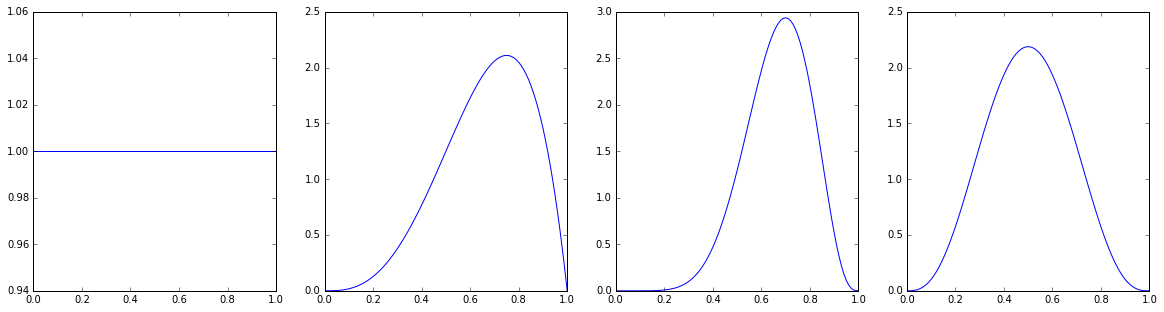

In [2]:
theta = np.linspace(0,1,101)

fig, axarr = plt.subplots(1,4, figsize=(20, 5))
axarr[0].plot(theta, beta.pdf(theta,1,1)) # a uniform prior
axarr[1].plot(theta, beta.pdf(theta,4,2)) # 2/3 prior mean with small sample size 6
axarr[2].plot(theta, beta.pdf(theta,8,4)) # 2/3 prior mean with small larger size 12
axarr[3].plot(theta, beta.pdf(theta,4,4)) # .05 prior
plt.show()

We'll use Beta(8,4) as our prior.

What are the probalities under our prior? >.25, .5 and .8

In [3]:
a = 1 - beta.cdf(.25,8,4)
b = 1 - beta.cdf(.5,8,4)
c = 1 - beta.cdf(.8,8,4)
(a,b,c)

(0.9988117218017578, 0.88671875, 0.16113919999999993)

collecting data, student1 answers 40 qs and gets 33 right. What's our posterior?

Beta(8+33 = 41, 4+7 = 11)

Posteriors:

In [4]:
print(41/(41+11)) # posterior mean
print(33/40) # MLE

0.7884615384615384
0.825


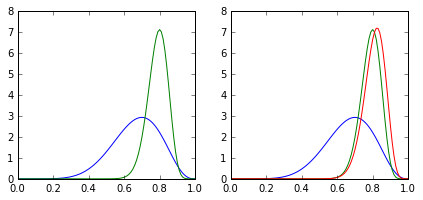

In [5]:
from scipy.stats import binom
X = [x for x in range(0,44)]
# plotting the prior, the posterior and the likelihood
fig, axarr = plt.subplots(1,2, figsize=(7, 3))
axarr[0].plot(theta, beta.pdf(theta,8,4)) 
axarr[0].plot(theta, beta.pdf(theta,41,11)) 
axarr[1].plot(theta, beta.pdf(theta,8,4)) 
axarr[1].plot(theta, beta.pdf(theta,41,11)) 
axarr[1].plot(theta, binom.pmf(33,40,theta)*44) 
plt.show()
# axes 1 shows prior vs posterior, axes 2 shows posterior vs (scaled) likelihood function of theta under binomial distr. 
# Note posterior is 'between' the prior and likelihood because it incorporates info from both. It's more weighted to the 
# likelihood, since n=40, prior sample size was 12

What are the probalities under our Posterior? >.25, .5 and .8

In [6]:
a = 1 - beta.cdf(.25,41,11)
b = 1 - beta.cdf(.5,41,11)
c = 1 - beta.cdf(.8,41,11)
(a,b,c)

(0.9999999999999999, 0.9999926311420575, 0.44440438256879644)

In [7]:
# What is the 95% equal tailed credible interval?
(beta.ppf(.025,41,11),beta.ppf(.975,41,11)) # note ppf is the equivalent of qbeta in R

(0.6688426487470713, 0.8871094002502565)

The 2nd student gets 24 right. What is posterior theta2?  P(>.25)? P(>.5)? P(>.8)? what is a 95% posterior credible interval?

In [8]:
(8+24,4+(40-24))

(32, 20)

In [9]:
print(32/(32+20)) # posterior mean
print(24/40) # MLE

a = 1 - beta.cdf(.25,32,20)
b = 1 - beta.cdf(.5,32,20)
c = 1 - beta.cdf(.8,32,20)

print((a,b,c))
print((beta.ppf(.025,32,20),beta.ppf(.975,32,20)))

0.6153846153846154
0.6
(0.9999999863130408, 0.9540427250920729, 0.001248189858039872)
(0.4808021582419634, 0.7415563647178172)


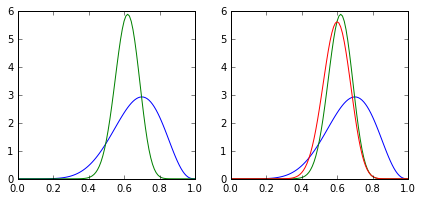

In [10]:
theta = np.linspace(0,1,101)
X = [x for x in range(0,44)]
# plotting the prior, the posterior and the likelihood
fig, axarr = plt.subplots(1,2, figsize=(7, 3))
axarr[0].plot(theta, beta.pdf(theta,8,4)) 
axarr[0].plot(theta, beta.pdf(theta,32,20)) 
axarr[1].plot(theta, beta.pdf(theta,8,4)) 
axarr[1].plot(theta, beta.pdf(theta,32,20)) 
axarr[1].plot(theta, binom.pmf(24,40,theta)*44) 
plt.show()

What is the posterior probability that theta1>theta2, i.e. that the first student has a better chance of getting a question right than the second? 

This is tough to do alebraically, so we're going to do it by simulation.
Draw 1000 samples from each and see how often we observe theta1>theta2

In [11]:
r1 = beta.rvs(41,11,size=10000)
r2 = beta.rvs(32,20,size=10000)
np.mean(r1>r2)

0.9739

## Lesson 7 Quiz

For Questions 1-5, consider the example of flipping a coin with unknown probability of heads $\theta$:

Suppose we use a Bernoulli likelihood for each coin flip, i.e., $f(y_i \mid \theta) = \theta^{y_i} (1-\theta)^{1-y_i} I_{\{ 0 \le \theta \le 1 \}}$ for $y_i=0$ or $y_i = 1$, and a uniform prior for $\theta$

### Q1

What is the posterior distribution for $\theta$ if we observe the following sequence: (T, T, T, T) where H denotes heads $(Y=1)$ and T denotes tails $(Y=0)$?

For Bernoulli experiments with a uniform prior, our posterior is:

$$\theta \mid \tilde{y} \sim Beta(1 + \Sigma y_i, 1 + n - \Sigma y_i)$$

So here it's $Beta(1,5)$.

### Q2
What graph depicts the posterior PDF of $\theta$ if we observe the sequence (T, T, T, T)? (You may want to use R or Excel to plot the posterior.)

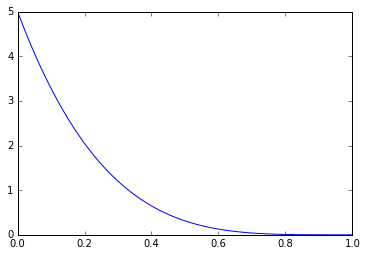

In [12]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import binom

# create a linearspace for theta and do the beta function
theta = np.linspace(0,1,101)
ftheta = beta.pdf(theta, 1,5)

# plot
plt.plot(theta, ftheta)
plt.show()

### Q3
What is the maximum likelihood estimate (MLE) of $\theta$ if we observe the sequence (T, T, T, T)?

Recall $L(\theta \mid \tilde{x}) = \prod_{i=0}^n P(x_i \mid \theta)$.

For a bernoulli distribution this is:

$$L(\theta \mid \tilde{x}) = \prod_{i=0}^n \theta^{x_i} (1-\theta)^{1-x_i} = 4(1-\theta)$$

Likelyhood is maximised here when $\hat{\theta}=0$

Which ties with the above plot. 

### Q4
What is the posterior mean estimate of $\theta$ if we observe the sequence (T, T, T, T)? Round your answer to two decimal places.

$$\frac{\alpha+\beta}{\alpha+\beta+n} \cdot \frac{\alpha}{\alpha+\beta} + \frac{n}{\alpha+\beta+n} \cdot \frac{\Sigma y_i}{n} = \frac{2}{6} \frac{1}{2}  + \frac{4}{6} \frac{0}{4} = \frac{1}{6} = 0.17$$

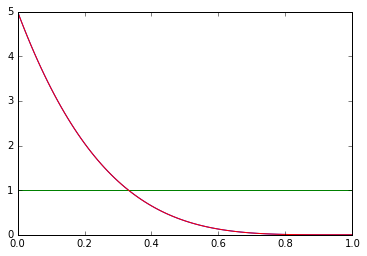

In [13]:
theta = np.linspace(0,1,101)
plt.plot(theta, binom.pmf(0,4,theta)*5)
plt.plot(theta, beta.pdf(theta, 1,1))
plt.plot(theta, beta.pdf(theta, 1,5))
plt.show()

### Q5
Use R or Excel to find the posterior probability that $\theta < 0.5$ if we observe the sequence (T,T,T,T). Round your answer to two decimal places.

In [14]:
beta.cdf(0.5,1,5)

0.96875

For Questions 6-9, consider the following scenario:

An engineer wants to assess the reliability of a new chemical refinement process by measuring $\theta$, the proportion of samples that fail a battery of tests. These tests are expensive, and the budget only allows 20 tests on randomly selected samples. Assuming each test is independent, she assigns a binomial likelihood where $X$ counts the samples which fail. Historically, new processes pass about half of the time, so she assigns a Beta(2,2) prior for $\theta$ (prior mean 0.5 and prior sample size 4). The outcome of the tests is 6 fails and 14 passes.

### Q6 
What is the posterior distribution for $\theta$?

Beta(8,16)

### Q7
Use R or Excel to calculate the upper end of an equal-tailed 95% credible interval for $\theta$. Round your answer to two decimal places.



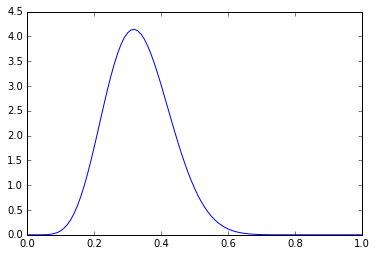

In [15]:
plt.plot(theta, beta.pdf(theta,8,16))
plt.show()

In [16]:
(beta.ppf(0.025,8,16),beta.ppf(0.975,8,16))

(0.16376359837494986, 0.5291916660085065)

### Q8
The engineer tells you that the process is considered promising and can proceed to another phase of testing if we are 90% sure that the failure rate is less than .35.

Calculate the posterior probability $P(\theta < .35 \mid x)$. In your role as the statistician, would you say that this new chemical should pass?



In [17]:
beta.cdf(0.35,8,16)

0.5864310314450809

### Q9
It is discovered that the budget will allow five more samples to be tested. These tests are conducted and none of them fail.

Calculate the new posterior probability $P(\theta < .35 \mid x_1, x_2)$. In your role as the statistician, would you say that this new chemical should pass (with the same requirement as in the previous question)?

Hint: You can use the posterior from the previous analysis as the prior for this analysis. Assuming independence of tests, this yields the same posterior as the analysis in which we begin with the Beta(2,2) prior and use all 25 tests as the data.

The new posterior $\theta_2$ is Beta(8,16+5)

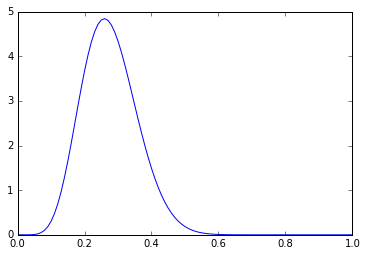

In [18]:
plt.plot(theta, beta.pdf(theta,8,21))
plt.show()

In [19]:
beta.cdf(0.35,8,21)

0.8179064455690616

### Q10
Let $X \mid \theta \sim \text{Binomial}(9, \theta)$ and assume a $\text{Beta}(\alpha, \beta)$ prior for $\theta$. Suppose your prior guess (prior expectation) for $\theta$ is 0.4 and you wish to use a prior effective sample size of 5, what values of $\alpha$ and $\beta$ should you use?

In [20]:
(0.4*5,0.6*5)

(2.0, 3.0)

## Lesson 8.1: Poisson Data
Consider chocolcate chips in cookies. They make a bunch of dough, mix in chips, and divide it into cookies. The number of chips per cookie follows an approximately Poisson distribution (it would be perfectly Poisson if the chips had no volume). 

$ Y-i \sim Pois(\lambda)$, the likelyhood function is 

$$f(\tilde{y} \mid \lambda) = \frac{\lambda^{\Sigma y_i} e^{-n\lambda}}{\prod_{i=1}^{n} y_i!} \text{ for } \lambda > 0$$

Can we use a conjugate prior for this? What distribution look like lambda to the the something, e to the minus something lambda? The Gamma distribution. So Gamma prior is going to look like

$$\lambda \sim \Gamma(\alpha, \beta)$$ 

$$f(\lambda) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha - 1}  e^{-\beta\lambda}$$

$$f(\lambda \mid \tilde{y}) \propto f(\tilde{y} \mid \lambda)f(\lambda) \propto \lambda^{\Sigma y_i}e^{-n\lambda}\lambda^{\alpha-1}e^{-\beta\lambda} \propto \lambda^{\left(\alpha+\Sigma y_i\right)-1} e^{-\left(\beta +n \right)\lambda}$$

(after dropping the non-$\lambda$ terms, which we don't care about because this is a proportional relationship)

Posterior is therefore $\Gamma(\alpha+\Sigma y_i, \beta+n)$

Mean of Gamma is $\frac{\alpha}{\beta}$, so posterior mean is

$$\frac{\alpha+\Sigma y_i}{\beta +n} =  \frac{\beta}{\beta +n}  \cdot \frac{\alpha}{\beta}  + \frac{n}{\beta +n} \cdot \frac{\Sigma y_i}{n}$$

Again, it's a weighted average of the prior mean and the data mean, and the effective data size of the prior is $\beta$

How would we choose our priors, for example in the cookie case? 

There are two broad strategies:

The first is to include information in our prior based on personal experience. Start by thinking about the prior mean, (alpha/beta). In this case what do we think the number of chips per cookie is? 

But we need more before we can mathematically solve for alpha and beta, we need another equivalence equation basially. We could use an estimate of variance/StdDv. This can be though of as 'how sure are we about out prior mean?'. We can then use the Gamma std dev. forumla $\sqrt{\alpha}/\beta$. 

Alternatively to get our second second formula we could think about how big we think our effective sample size $\beta$ is. Really this is the same thing.

The second option is a 'vague' prior which containes no information. Equivalent to a uniform 0,1 prior in the Binomial/Beta pair, it's a prior where the pdf is basically flat.

Here we can think about some small $\epsilon>0$, and have our prior be $\Gamma(\epsilon,\epsilon)$

So the mean will episilon over epsilon, which is one, but the SD will be huge, 1\episilon.

If Epsilon (and therefore Beta) is small compared to n, the weighting given to the prior in the posterior mean will be very small.

## Lesson 8 Quiz

For Questions 1-8, consider the chocolate chip cookie example from the lesson.

As in the lesson, we use a Poisson likelihood to model the number of chips per cookie, and a conjugate gamma prior on $\lambda$, the expected number of chips per cookie. Suppose your prior expectation for $\lambda$ is 8.

### Q1
The conjugate prior with mean 8 and effective sample size of 2 is Gamma(a,2). Find the value of $a$.

In [38]:
beta = 2
mean = 8
alpha = beta * mean
alpha

16

### Q2

The conjugate prior with mean 8 and standard deviation 1 is Gamma(a,8). Find the value of a.


In [43]:
beta = 8
mean = 8
alpha = beta * mean
stddev = np.sqrt(alpha)/beta
(alpha, stddev)

(64, 1.0)

### Q3
Suppose you are not very confident in your prior guess of 8, so you want to use a prior effective sample size of 1/100 cookies. Then the conjugate prior is Gamma(a,0.01). Find the value of a. Round your answer to two decimal places.

In [44]:
beta = 1/100
mean = 8
alpha = beta * mean
stddev = np.sqrt(alpha)/beta
(alpha, stddev)

(0.08, 28.2842712474619)

### Q4
Suppose you decide on the prior Gamma(8, 1), which has prior mean 8 and effective sample size of one cookie.

We collect data, sampling five cookies and counting the chips in each. We find 9, 12, 10, 15, and 13 chips.

What is the posterior distribution for λ?

$\Gamma(\alpha+\Sigma y_i, \beta+n) = \Gamma(8+(9+12+10+15+13), 1+5) = \Gamma(67, 6) $

### Q5
Continuing the previous question, plot the the prior density (dotted line) and posterior density (solid line) of λ

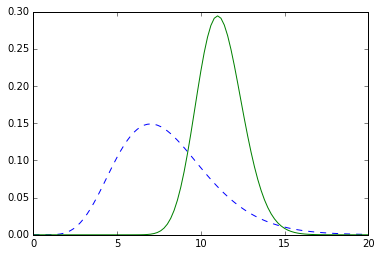

In [48]:
lam = np.linspace(0,20,101)
alpha0 = 8
beta0 = 1

plt.plot(lam, gamma.pdf(lam,a=alpha0, scale=1/beta0),linestyle = 'dashed')
alpha1 = 67
beta1 = 6

plt.plot(lam, gamma.pdf(lam,a=alpha1, scale=1/beta1))
plt.show()

### Q6
Continuing Question 4, what is the posterior mean for λ? Round your answer to one decimal place.

$$\frac{\alpha+\Sigma y_i}{\beta +n} =  \frac{\beta}{\beta +n}  \cdot \frac{\alpha}{\beta}  + \frac{n}{\beta +n} \cdot \frac{\Sigma y_i}{n}$$

In [53]:
alpha0 = 8
beta0 = 1
y = [9,12,10,15,13]
n = len(y)
postmean = (alpha0 + np.sum(y))/(beta0 + n)
(np.sum(y),n,postmean)

(59, 5, 11.166666666666666)

### Q7
Continuing Question 4, use R or Excel to find the lower end of a 90% equal-tailed credible interval for λ. Round your answer to one decimal place.

In [51]:
gamma.ppf(0.05,a=67, scale=1/6)

9.021381966387127

### Q8
Continuing Question 4, suppose that in addition to the five cookies reported, we observe an additional ten cookies with 109 total chips. What is the new posterior distribution for λ, the expected number of chips per cookie?

Hint: You can either use the posterior from the previous analysis as the prior here, or you can start with the original Gamma(8,1) prior and update with all fifteen cookies. The result will be the same.


$\Gamma(\alpha+\Sigma y_i, \beta+n) = \Gamma(67+109, 6+10) = \Gamma(176, 16) $

For Questions 9-10, consider the following scenario:

A retailer notices that a certain type of customer tends to call their customer service hotline more often than other customers, so they begin keeping track. They decide a Poisson process model is appropriate for counting calls, with calling rate $\theta$ calls per customer per day.

The model for the total number of calls is then $Y \sim \text{Poisson}(n\cdot t \cdot \theta)$ where $n$ is the number of customers in the group and $t$ is the number of days. That is, if we observe the calls from a group with 24 customers for 5 days, the expected number of calls would be $24\cdot 5\cdot \theta = 120\cdot \theta$.

The likelihood for $Y$ is then $f(y \mid \theta) = \frac{(nt\theta)^y e^{-nt\theta}}{y!} \propto \theta^y e^{-nt\theta}$.

This model also has a conjugate gamma prior $\theta \sim \text{Gamma}(a, b)$ which has density (PDF) $f(\theta) = \frac{b^a}{\Gamma(a)} \theta^{a-1} e^{-b\theta} \propto \theta^{a-1} e^{-b\theta}$.

### Q9
Following the same procedure outlined in the lesson, find the posterior distribution for $\theta$.

$\Gamma(a+\Sigma y_i, b+n) = $

### Q10 
On average, the retailer receives 0.01 calls per customer per day. To give this group the benefit of the doubt, they set the prior mean for $\theta$ at 0.01 with standard deviation 0.5. This yields a $\text{Gamma}(\frac{1}{2500}, \frac{1}{25})$ prior for $\theta$.

Suppose there are $n=24$ customers in this particular group of interest, and the retailer monitors calls from these customers for $t=5$ days. They observe a total of $y=6$ calls from this group.

The following graph shows the resulting $\text{Gamma}(6.0004, 120.04)$ posterior for $\theta$, the calling rate for this group. The vertical dashed line shows the average calling rate of 0.01.

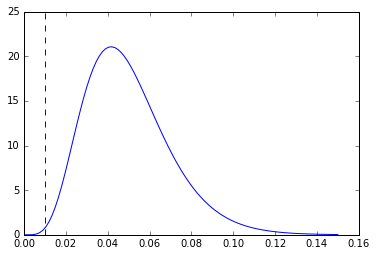

In [37]:
theta = np.linspace(0,0.15,101)
alpha = 6.0004
beta = 120.04
plt.plot(theta, gamma.pdf(theta,a=alpha, scale=1/beta))
plt.axvline(x=0.01,linestyle='dashed')
plt.show()

Does this posterior inference for $\theta$ suggest that the group has a higher calling rate than the average of 0.01 calls per customer per day?